In [71]:
# Imports
import pandas as pd
import numpy as np
import datetime
from datetime import time as dtime
from datetime import timedelta
from datetime import date
import matplotlib as plt
from itertools import product
import openpyxl

# importing historical data for backtest
def get1minBars(csvName):
    
    priceData1minBars_df = pd.read_csv(csvName, usecols=['date', 'open', 'high', 'low', 'close', 'volume'])
    
    # Parse datetime column and divide in 2 columns
    # SPY_Data['datetime'] = pd.to_datetime(SPY_Data['date'].str.strip(), format='%Y%m%d %H:%M:%S')
    priceData1minBars_df.rename(columns={
        'date': 'datetime'
    }, inplace=True)
    
    priceData1minBars_df['datetime'] = pd.to_datetime(priceData1minBars_df['datetime'])
    
    priceData1minBars_df['Date'] = priceData1minBars_df['datetime'].dt.date
    priceData1minBars_df['Time'] = priceData1minBars_df['datetime'].dt.time
    
    # sorting the data by the time column to make sure it is consistent
    priceData1minBars_df.sort_values('datetime', inplace=True)
    
    # Drop original 'date' column
    # SPY_Data.drop(columns=['date'], inplace=True)
    
    # Filter for regular trading hours using datetime column
    # priceData1minBars_df = priceData1minBars_df[priceData1minBars_df['datetime'].dt.time >= pd.to_datetime("09:30").time()]
    # priceData1minBars_df = priceData1minBars_df[priceData1minBars_df['datetime'].dt.time <= pd.to_datetime("16:00").time()]
    
    # Making sure the order of the columns stays the same 
    priceData1minBars_df = priceData1minBars_df[['Date', 'Time', 'open', 'high', 'low', 'close', 'volume']]
    
    return priceData1minBars_df
    
    


In [72]:
NQ_Data = get1minBars('NQ_1min_master.csv')
# QQQ_Data = QQQ_Data[472980:483000]
NQ_Data = NQ_Data[:int(len(NQ_Data)/2)]
NQ_Data

,Date,Time,open,high,low,close,volume
0,2023-11-01,22:00:00,14761.25,14763.50,14760.00,14760.00,175
1,2023-11-01,22:01:00,14760.50,14764.00,14760.50,14762.00,156
2,2023-11-01,22:02:00,14762.25,14762.25,14760.50,14761.25,48
3,2023-11-01,22:03:00,14761.25,14762.00,14760.75,14761.00,30
4,2023-11-01,22:04:00,14761.75,14763.00,14761.00,14762.25,52
...,...,...,...,...,...,...,...
706568,2025-10-31,20:55:00,25988.50,25994.25,25987.75,25993.00,138
706569,2025-10-31,20:56:00,25993.50,25993.50,25988.25,25988.50,57
706570,2025-10-31,20:57:00,25989.00,25990.00,25985.00,25986.50,45
706571,2025-10-31,20:58:00,25984.75,25986.50,25981.50,25983.50,79


In [73]:
# Imports
import pandas as pd
import numpy as np
import datetime
from datetime import time as dtime
from datetime import timedelta
from datetime import date
import matplotlib as plt
from itertools import product
import openpyxl


# importing historical data for backtest
def get1minBars(csvName):
    priceData1minBars_df = pd.read_csv(csvName, usecols=['date', 'open', 'high', 'low', 'close', 'volume'])

    # Parse datetime column and divide in 2 columns
    # SPY_Data['datetime'] = pd.to_datetime(SPY_Data['date'].str.strip(), format='%Y%m%d %H:%M:%S')
    priceData1minBars_df.rename(columns={
        'date': 'datetime'
    }, inplace=True)

    priceData1minBars_df['datetime'] = pd.to_datetime(priceData1minBars_df['datetime'])

    priceData1minBars_df['Date'] = priceData1minBars_df['datetime'].dt.date
    priceData1minBars_df['Time'] = priceData1minBars_df['datetime'].dt.time

    # sorting the data by the time column to make sure it is consistent
    priceData1minBars_df.sort_values('datetime', inplace=True)

    # Drop original 'date' column
    # SPY_Data.drop(columns=['date'], inplace=True)

    # Filter for regular trading hours using datetime column
    # priceData1minBars_df = priceData1minBars_df[priceData1minBars_df['datetime'].dt.time >= pd.to_datetime("09:30").time()]
    # priceData1minBars_df = priceData1minBars_df[priceData1minBars_df['datetime'].dt.time <= pd.to_datetime("16:00").time()]

    # Making sure the order of the columns stays the same
    priceData1minBars_df = priceData1minBars_df[['Date', 'Time', 'open', 'high', 'low', 'close', 'volume']]

    return priceData1minBars_df


QQQ_Data = get1minBars('NQ_1min_master.csv')
# QQQ_Data = QQQ_Data[472980:483000]
QQQ_Data = QQQ_Data[:int(len(QQQ_Data) / 2)]
QQQ_Data

import numpy as np
import pandas as pd
from datetime import time as dtime

# ------- Minimal ADX helper (used only if DIp14/60, DIn14/60, ADX14/60 not already present) -------
def _compute_adx_block(df, n=14, per_session=True):
    out = df.copy()
    if per_session:
        prev_high = out.groupby('Date')['high'].shift(1)
        prev_low  = out.groupby('Date')['low'].shift(1)
        prev_close= out.groupby('Date')['close'].shift(1)
    else:
        prev_high = out['high'].shift(1)
        prev_low  = out['low'].shift(1)
        prev_close= out['close'].shift(1)

    up_move   = out['high'] - prev_high
    down_move = prev_low - out['low']
    plus_dm   = np.where((up_move > 0) & (up_move > down_move), up_move, 0.0)
    minus_dm  = np.where((down_move > 0) & (down_move > up_move), down_move, 0.0)
    plus_dm   = pd.Series(plus_dm, index=out.index)
    minus_dm  = pd.Series(minus_dm, index=out.index)

    tr1 = (out['high'] - out['low']).abs()
    tr2 = (out['high'] - prev_close).abs()
    tr3 = (out['low'] - prev_close).abs()
    tr = np.maximum(tr1, np.maximum(tr2, tr3)).fillna(tr1)

    def _smooth(s, n_):
        return s.ewm(alpha=1/n_, adjust=False).mean()

    if per_session:
        tr_n      = tr.groupby(out['Date']).transform(lambda s: _smooth(s, n))
        plus_dm_n = plus_dm.groupby(out['Date']).transform(lambda s: _smooth(s, n))
        minus_dm_n= minus_dm.groupby(out['Date']).transform(lambda s: _smooth(s, n))
    else:
        tr_n      = _smooth(tr, n)
        plus_dm_n = _smooth(plus_dm, n)
        minus_dm_n= _smooth(minus_dm, n)

    eps = 1e-12
    dip = 100.0 * (plus_dm_n / (tr_n + eps))
    din = 100.0 * (minus_dm_n / (tr_n + eps))
    dx  = 100.0 * (np.abs(dip - din) / (dip + din + eps))
    adx = (dx.groupby(out['Date']).transform(lambda s: _smooth(s, n))
           if per_session else _smooth(dx, n))

    return dip, din, adx

# ------- ATR helper (Wilder), per session if desired -------
def _wilder_atr(df, n, per_session=True):
    if per_session:
        prev_close = df.groupby('Date')['close'].shift(1)
    else:
        prev_close = df['close'].shift(1)
    tr1 = (df['high'] - df['low']).abs()
    tr2 = (df['high'] - prev_close).abs()
    tr3 = (df['low'] - df['close'].shift(1)).abs()
    tr = np.maximum(tr1, np.maximum(tr2, tr3)).fillna(tr1)
    smooth = tr.groupby(df['Date']).transform(lambda s: s.ewm(alpha=1/n, adjust=False).mean()) \
             if per_session else tr.ewm(alpha=1/n, adjust=False).mean()
    return smooth

# ------- Time-in-window helper (handles str, datetime.time, or Timestamp) -------
def _in_windows(t, windows):
    if isinstance(t, pd.Timestamp):
        tt = t.time()
    elif isinstance(t, str):
        # parse fast HH:MM:SS or HH:MM
        parts = [int(x) for x in t.split(':')]
        while len(parts) < 3: parts.append(0)
        tt = dtime(parts[0], parts[1], parts[2])
    else:
        tt = t  # assume datetime.time
    for start, end in windows:
        if start <= tt <= end:
            return True
    return False

def classify_market_regime(
    df,
    atr_per_session=True,
    params=None,
    time_windows=None,
):
    """
    Adds regime labels & filters.

    Inputs:
      df: DataFrame with columns ['Date','Time','open','high','low','close','volume']
          and ideally DIp14/DIn14/ADX14 & DIp60/DIn60/ADX60 (will compute if missing).
      atr_per_session: reset ATR/ADX within each Date session if True.

    params (defaults below):
      {
        'adx14_chop': 20,
        'adx60_trend': 18,
        'vol_ratio_expand': 1.20,   # ATR5/ATR60 >= expand → expansion
        'vol_ratio_chop':   0.90,   # ATR5/ATR60 <= chop   → compression
        'adx14_rise_lookback': 5,   # rising ADX14 over N bars
        'min_range_mult_exhaust': 2.0,  # optional: mark exhaustion bars (not used to filter, but computed)
      }

    time_windows:
      list of (start_time, end_time) tuples; times as datetime.time.
      Defaults to RTH focus: [(09:35, 11:30), (13:30, 15:30)] Eastern-like.
    """
    if params is None:
        params = dict(
            adx14_chop=20,
            adx60_trend=18,
            vol_ratio_expand=1.20,
            vol_ratio_chop=0.90,
            adx14_rise_lookback=5,
            min_range_mult_exhaust=2.0,
        )

    if time_windows is None:
        time_windows = [(dtime(9,35), dtime(11,30)), (dtime(13,30), dtime(15,30))]

    out = df.copy()
    out[['open','high','low','close']] = out[['open','high','low','close']].astype(float)

    # --- Ensure ADX14/60 (+DI/-DI) exist (compute if missing) ---
    need_14 = not {'DIp14','DIn14','ADX14'}.issubset(out.columns)
    need_60 = not {'DIp60','DIn60','ADX60'}.issubset(out.columns)
    if need_14:
        dip14, din14, adx14 = _compute_adx_block(out, n=14, per_session=atr_per_session)
        out['DIp14'], out['DIn14'], out['ADX14'] = dip14, din14, adx14
    if need_60:
        dip60, din60, adx60 = _compute_adx_block(out, n=60, per_session=atr_per_session)
        out['DIp60'], out['DIn60'], out['ADX60'] = dip60, din60, adx60

    # --- ATRs & Volatility ratio ---
    out['ATR5']  = _wilder_atr(out, 5,  per_session=atr_per_session)
    out['ATR60'] = _wilder_atr(out, 60, per_session=atr_per_session)
    eps = 1e-12
    out['vol_ratio'] = (out['ATR5'] / (out['ATR60'] + eps)).clip(lower=0)

    # --- ADX14 rising metric ---
    look = int(params['adx14_rise_lookback'])
    out['ADX14_rise'] = out['ADX14'] - out['ADX14'].shift(look)

    # --- Optional: exhaustion bar marker (current range vs 20-bar avg) ---
    out['range'] = (out['high'] - out['low']).abs()
    out['avg_range20'] = out['range'].rolling(20).mean()
    out['is_exhaustion'] = out['range'] > (params['min_range_mult_exhaust'] * out['avg_range20'])

    # --- Regime rules ---
    chop = (out['ADX14'] <= params['adx14_chop']) & (out['vol_ratio'] <= params['vol_ratio_chop'])
    trend_up   = (out['ADX60'] >= params['adx60_trend']) & (out['DIp60'] > out['DIn60'])
    trend_down = (out['ADX60'] >= params['adx60_trend']) & (out['DIp60'] < out['DIn60'])
    expansion  = (out['vol_ratio'] >= params['vol_ratio_expand']) & (out['ADX14_rise'] > 0)

    # Priority: expansion > trend > chop > neutral
    regime = np.where(expansion, 'expansion',
              np.where(trend_up, 'trend_up',
              np.where(trend_down, 'trend_down',
              np.where(chop, 'chop', 'neutral'))))
    out['regime'] = regime

    # Side bias
    out['side_bias'] = np.where(out['regime']=='trend_up', 'long',
                         np.where(out['regime']=='trend_down', 'short', 'neutral'))

    # Time-of-day tradability
    out['in_window'] = [ _in_windows(t, time_windows) for t in out['Time'] ]
    # Tradable regimes (you can tweak)
    tradable_regimes = {'expansion', 'trend_up', 'trend_down'}
    # out['tradable'] = out['in_window'] & out['regime'].isin(tradable_regimes)
    out['tradable'] = out['regime'].isin(tradable_regimes)

    return out

regime_df = classify_market_regime(NQ_Data)


sig_cols = ['regime','side_bias','tradable','in_window',
            'vol_ratio','ADX14','ADX60','DIp60','DIn60','DIp14','DIn14',
            'ADX14_rise','ATR5','ATR60']

regime_df[sig_cols] = regime_df.groupby('Date')[sig_cols].shift(1)
regime_df

,Date,Time,open,high,low,close,volume,DIp14,DIn14,ADX14,DIp60,DIn60,ADX60,ATR5,ATR60,vol_ratio,ADX14_rise,range,avg_range20,is_exhaustion,regime,side_bias,in_window,tradable
0,2023-11-01,22:00:00,14761.25,14763.50,14760.00,14760.00,175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.50,NaN,False,NaN,NaN,NaN,NaN
1,2023-11-01,22:01:00,14760.50,14764.00,14760.50,14762.00,156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000,3.500000,1.000000,NaN,3.50,NaN,False,neutral,neutral,False,False
2,2023-11-01,22:02:00,14762.25,14762.25,14760.50,14761.25,48,1.010101,0.000000,7.142857,0.237530,0.000000,1.666667,3.600000,3.508333,1.026128,NaN,1.75,NaN,False,neutral,neutral,False,False
3,2023-11-01,22:03:00,14761.25,14762.00,14760.75,14761.00,30,0.973054,0.000000,13.775510,0.235538,0.000000,3.305556,3.230000,3.479028,0.928420,NaN,1.25,NaN,False,neutral,neutral,False,False
4,2023-11-01,22:04:00,14761.75,14763.00,14761.00,14762.25,52,0.946355,0.000000,19.934402,0.234113,0.000000,4.917130,2.834000,3.441877,0.823388,NaN,2.00,NaN,False,chop,neutral,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706568,2025-10-31,20:55:00,25988.50,25994.25,25987.75,25993.00,138,19.928792,22.880417,18.920071,19.312489,23.610222,12.018958,4.555816,9.140271,0.498433,-5.551913,6.50,4.5125,False,chop,neutral,False,False
706569,2025-10-31,20:56:00,25993.50,25993.50,25988.25,25988.50,57,26.514783,20.903505,18.413893,20.227643,23.329032,11.937315,4.944653,9.096266,0.543592,-4.892072,5.25,4.6125,False,chop,neutral,False,False
706570,2025-10-31,20:57:00,25989.00,25990.00,25985.00,25986.50,45,24.661374,19.442330,17.943870,20.031685,23.103030,11.857032,5.005722,9.032162,0.554211,-3.721951,5.00,4.6125,False,chop,neutral,False,False
706571,2025-10-31,20:58:00,25984.75,25986.50,25981.50,25983.50,79,23.011597,22.490011,16.744044,19.845482,23.492481,11.799669,5.004578,8.964959,0.558238,-4.097219,5.00,4.6000,False,chop,neutral,False,False


In [74]:

def _round_tick(x, tick=0.25, how="nearest"):
        if pd.isna(x):
            return x
        r = x / tick
        if how == "nearest":
            return tick * np.round(r)
        elif how == "up":
            # tiny epsilon guards against floating drift (e.g., 100.999999)
            return tick * np.ceil(r - 1e-12)
        elif how == "down":
            return tick * np.floor(r + 1e-12)
        else:
            raise ValueError("how must be one of {'nearest','up','down'}")



def scalp_regime_long_only(
        df,
        target_points=10.50,
        slippage_points=0.50,  # slippage in *points*; set 0.25 for 1 tick on NQ
        tick=0.25,
        session_col="Date"
):
    data = df.copy(deep=True)

    # trailing means from *past* bars only
    data['trailing10_low'] = data['low'].rolling(10).mean().shift(1)
    data['trailing10_high'] = data['high'].rolling(10).mean().shift(1)

    # shift regime/side/tradable by 1 bar (decide at t, trade at t+1)
    sig_cols = ['tradable', 'side_bias']
    for c in sig_cols:
        if c in data.columns:
            data[c + '_sig'] = data.groupby(session_col)[c].shift(1)
        else:
            raise KeyError(f"Missing column '{c}' in df")

    trades = []
    in_pos = False
    entry_px = None
    target_px = None
    entry_idx = None
    entry_date = None

    for i in range(len(data) - 1):
        row = data.iloc[i]
        nxt = data.iloc[i + 1]

        # reset between sessions
        if i > 0 and data.iloc[i][session_col] != data.iloc[i - 1][session_col]:
            # flat at session boundary
            in_pos = False
            entry_px = None
            target_px = None
            entry_idx = None
            entry_date = None

        # --- ENTRY (decided at t, attempted/fills on t+1) ---
        if (not in_pos) and (row['tradable_sig'] is True) and (row['side_bias_sig'] == 'long'):
            if pd.notna(row['trailing10_low']):
                limit_px = _round_tick(row['trailing10_low']+0.25, tick, "nearest")
                # if price jumps through the limit price, buy the open price

                if nxt['open'] <= limit_px:
                    entry_px = nxt['open'] + slippage_points  # add slippage on fill
                    target_px = _round_tick(entry_px, tick, "nearest") + target_points
                    in_pos = True
                    entry_idx = i + 1
                    entry_date = nxt[session_col]

                # limit fill if the next bar trades through the price
                elif nxt['low'] <= limit_px:
                    entry_px = limit_px + slippage_points  # add slippage on fill
                    target_px = _round_tick(entry_px, tick, "nearest") + target_points
                    in_pos = True
                    entry_idx = i + 1
                    entry_date = nxt[session_col]



        # --- EXIT MANAGEMENT on the next bar (only if in position) ---
        if in_pos:
            # 1) Profit target: if next bar’s high reached it → exit at target
            if nxt['high'] >= target_px:
                exit_px = target_px - slippage_points
                trades.append({
                    'date': entry_date,
                    'entry_idx': entry_idx,
                    'exit_idx': i + 1,
                    'entry_price': entry_px,
                    'exit_price': exit_px,
                    'exit_reason': 'target',
                    'pnl_points': exit_px - entry_px
                })
                in_pos = False
                entry_px = target_px = None
                entry_idx = entry_date = None
                continue

            # 2) Side flip guard: if signal flips away from long, exit next bar at open
            if (row['side_bias_sig'] != 'long') or (row['tradable_sig'] is not True):
                exit_px = nxt['open'] - slippage_points
                trades.append({
                    'date': entry_date,
                    'entry_idx': entry_idx,
                    'exit_idx': i + 1,
                    'entry_price': entry_px,
                    'exit_price': exit_px,
                    'exit_reason': 'flip_exit',
                    'pnl_points': exit_px - entry_px
                })
                in_pos = False
                entry_px = target_px = None
                entry_idx = entry_date = None

    return pd.DataFrame(trades)


test = scalp_regime_long_only(regime_df)
test

,date,entry_idx,exit_idx,entry_price,exit_price,exit_reason,pnl_points
0,2023-11-01,19,66,14768.25,14778.25,target,10.00
1,2023-11-01,88,120,14784.50,14794.50,target,10.00
2,2023-11-02,178,191,14798.00,14808.00,target,10.00
3,2023-11-02,200,226,14805.50,14815.50,target,10.00
4,2023-11-02,227,285,14810.75,14808.00,flip_exit,-2.75
...,...,...,...,...,...,...,...
2997,2025-10-29,702709,702769,26245.50,26229.75,flip_exit,-15.75
2998,2025-10-29,702953,702959,26277.50,26277.00,flip_exit,-0.50
2999,2025-10-30,703968,704001,26298.25,26289.00,flip_exit,-9.25
3000,2025-10-30,704782,704782,26114.50,26124.50,target,10.00


In [75]:
print(test['pnl_points'].sum())
print(len(test[test['pnl_points']>0])/len(test))
print(len(test))


3258.25
0.6572285143237842
3002


In [76]:
print(test['pnl_points'].sum())
print(len(test[test['pnl_points']>0])/len(test))
print(len(test))


3258.25
0.6572285143237842
3002


n_trades                 3002.000000
win_rate                    0.661193
avg_win                     9.200456
avg_loss                  -14.732196
payoff_ratio                0.624514
expectancy_per_trade        1.091907
gross_profit            18152.500000
gross_loss              14894.250000
profit_factor               1.218759
total_pnl                3258.250000
median_pnl                 10.000000
max_drawdown             -420.250000
sharpe_per_trade            3.762126
dtype: float64


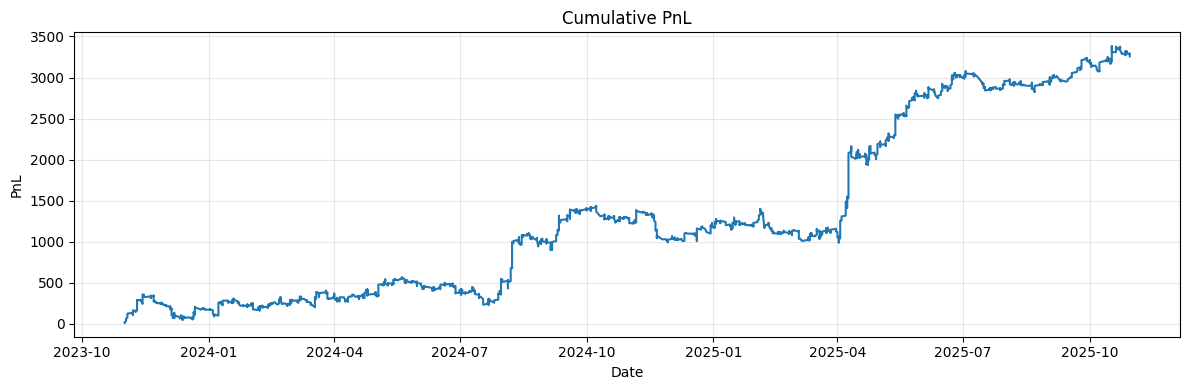

,date,entry_idx,exit_idx,entry_price,exit_price,exit_reason,pnl_points,Date
0,2023-11-01,19,66,14768.25,14778.25,target,10.00,2023-11-01
1,2023-11-01,88,120,14784.50,14794.50,target,10.00,2023-11-01
2,2023-11-02,178,191,14798.00,14808.00,target,10.00,2023-11-02
3,2023-11-02,200,226,14805.50,14815.50,target,10.00,2023-11-02
4,2023-11-02,227,285,14810.75,14808.00,flip_exit,-2.75,2023-11-02
...,...,...,...,...,...,...,...,...
2997,2025-10-29,702709,702769,26245.50,26229.75,flip_exit,-15.75,2025-10-29
2998,2025-10-29,702953,702959,26277.50,26277.00,flip_exit,-0.50,2025-10-29
2999,2025-10-30,703968,704001,26298.25,26289.00,flip_exit,-9.25,2025-10-30
3000,2025-10-30,704782,704782,26114.50,26124.50,target,10.00,2025-10-30


In [77]:

def trade_stats(df, pnl_col='returns', r_col=None, equity_start=0.0):
    """
    df must have a PnL column (default: 'returns').
    If you also have an R-multiple column, pass its name via r_col.
    Returns (stats_dict, equity_series, drawdown_series).
    """
    # sort (optional, helps equity curve look right)
    if {'Date','timeExit'}.issubset(df.columns):
        df = df.sort_values(['Date','timeExit'])
    s = pd.Series(df[pnl_col].astype(float).values)
    n = int(s.size)
    if n == 0:
        return {}, pd.Series(dtype=float), pd.Series(dtype=float)

    wins   = s[s > 0]
    losses = s[s < 0]

    gross_profit = float(wins.sum())
    gross_loss   = float(-losses.sum())  # positive number

    win_rate  = float(len(wins) / (len(wins) + len(losses)))
    loss_rate = float(len(losses) / (len(wins) + len(losses)))

    avg_win  = float(wins.mean())   if len(wins)   else 0.0
    avg_loss = float(losses.mean()) if len(losses) else 0.0  # negative
    payoff   = (avg_win / abs(avg_loss)) if len(wins) and len(losses) else np.inf

    profit_factor = (gross_profit / gross_loss) if gross_loss > 0 else np.inf
    expectancy    = win_rate * avg_win + loss_rate * avg_loss  # per trade

    equity = pd.Series(equity_start + s.cumsum(), name='equity')
    run_max = equity.cummax()
    drawdown = equity - run_max
    max_dd = float(drawdown.min())  # negative

    std = float(s.std(ddof=1))
    sharpe_per_trade = (float(s.mean() - 0.04) / std * np.sqrt(n)) if std > 0 and n > 1 else np.nan

    stats = {
        'n_trades': n,
        'win_rate': win_rate,
        'avg_win': avg_win,
        'avg_loss': avg_loss,                 # negative number
        'payoff_ratio': payoff,               # |avg_win| / |avg_loss|
        'expectancy_per_trade': expectancy,   # same units as returns
        'gross_profit': gross_profit,
        'gross_loss': gross_loss,
        'profit_factor': profit_factor,
        'total_pnl': float(s.sum()),
        'median_pnl': float(s.median()),
        'max_drawdown': max_dd,               # same units as returns
        'sharpe_per_trade': sharpe_per_trade
    }

    if r_col and r_col in df.columns:
        r = df[r_col].astype(float)
        stats.update({
            'avg_R': float(r.mean()),
            'median_R': float(r.median()),
            'total_R': float(r.sum()),
            'win_rate_Rpos': float((r > 0).mean())
        })

    return stats #, equity, drawdown


stats = trade_stats(test, pnl_col='pnl_points')
print(pd.Series(stats))




temp = test.copy(deep=True)

if 'date' in temp.columns:
    temp['Date'] = pd.to_datetime(temp['date'], errors='coerce')
    df = temp.sort_values('date')

r = pd.to_numeric(df['pnl_points'], errors='coerce').fillna(0)

# 1) Cumulative PnL (use for per-trade PnL/points)
df['cum_pnl'] = r.cumsum()


import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(df['Date'] if 'Date' in df.columns else df.index, df['cum_pnl'])
plt.title('Cumulative PnL')
plt.xlabel('Date' if 'Date' in df.columns else 'Trade #')
plt.ylabel('PnL')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

temp

In [78]:
def scalp_regime_short_only(
        df,
        target_points=10.50,
        slippage_points=0.50,  # slippage in *points*; set 0.25 for 1 tick on NQ
        tick=0.25,
        session_col="Date"
):
    data = df.copy(deep=True)

    # trailing means from *past* bars only
    data['trailing10_low'] = data['low'].rolling(10).mean().shift(1)
    data['trailing10_high'] = data['high'].rolling(10).mean().shift(1)

    # shift regime/side/tradable by 1 bar (decide at t, trade at t+1)
    sig_cols = ['tradable', 'side_bias']
    for c in sig_cols:
        if c in data.columns:
            data[c + '_sig'] = data.groupby(session_col)[c].shift(1)
        else:
            raise KeyError(f"Missing column '{c}' in df")

    trades = []
    in_pos = False
    entry_px = None
    target_px = None
    entry_idx = None
    entry_date = None

    for i in range(len(data) - 1):
        row = data.iloc[i]
        nxt = data.iloc[i + 1]

        # reset between sessions
        if i > 0 and data.iloc[i][session_col] != data.iloc[i - 1][session_col]:
            # flat at session boundary
            in_pos = False
            entry_px = None
            target_px = None
            entry_idx = None
            entry_date = None

        # --- ENTRY (decided at t, attempted/fills on t+1) ---
        if (not in_pos) and (row['tradable_sig'] is True) and (row['side_bias_sig'] == 'short'):
            if pd.notna(row['trailing10_high']):
                limit_px = _round_tick(row['trailing10_high'] - 0.25, tick, "nearest")
                # if price gaps through the limit price, short the open

                if nxt['open'] >= limit_px:
                    entry_px = nxt['open'] - slippage_points  # add slippage on fill (short)
                    target_px = _round_tick(entry_px, tick, "nearest") - target_points
                    in_pos = True
                    entry_idx = i + 1
                    entry_date = nxt[session_col]

                # limit fill if the next bar trades through the price
                elif nxt['high'] >= limit_px:
                    entry_px = limit_px - slippage_points  # add slippage on fill (short)
                    target_px = _round_tick(entry_px, tick, "nearest") - target_points
                    in_pos = True
                    entry_idx = i + 1
                    entry_date = nxt[session_col]

        # --- EXIT MANAGEMENT on the next bar (only if in position) ---
        if in_pos:
            # 1) Profit target: if next bar’s low reached it → exit at target
            if nxt['low'] <= target_px:
                exit_px = target_px + slippage_points
                trades.append({
                    'date': entry_date,
                    'entry_idx': entry_idx,
                    'exit_idx': i + 1,
                    'entry_price': entry_px,
                    'exit_price': exit_px,
                    'exit_reason': 'target',
                    'pnl_points': entry_px - exit_px
                })
                in_pos = False
                entry_px = target_px = None
                entry_idx = entry_date = None
                continue

            # 2) Side flip guard: if signal flips away from short, exit next bar at open
            if (row['side_bias_sig'] != 'short') or (row['tradable_sig'] is not True):
                exit_px = nxt['open'] + slippage_points
                trades.append({
                    'date': entry_date,
                    'entry_idx': entry_idx,
                    'exit_idx': i + 1,
                    'entry_price': entry_px,
                    'exit_price': exit_px,
                    'exit_reason': 'flip_exit',
                    'pnl_points': entry_px - exit_px
                })
                in_pos = False
                entry_px = target_px = None
                entry_idx = entry_date = None

    return pd.DataFrame(trades)


test_short = scalp_regime_short_only(regime_df)
test_short

,date,entry_idx,exit_idx,entry_price,exit_price,exit_reason,pnl_points
0,2023-11-02,152,167,14781.50,14798.25,flip_exit,-16.75
1,2023-11-05,2796,2804,15183.75,15173.75,target,10.00
2,2023-11-07,5230,5232,15360.75,15350.75,target,10.00
3,2023-11-07,5240,5245,15357.50,15347.50,target,10.00
4,2023-11-07,5255,5259,15360.75,15360.50,flip_exit,0.25
...,...,...,...,...,...,...,...
4483,2025-10-31,706342,706342,25943.75,25933.75,target,10.00
4484,2025-10-31,706343,706343,25942.50,25932.50,target,10.00
4485,2025-10-31,706358,706362,25913.75,25903.75,target,10.00
4486,2025-10-31,706363,706369,25914.00,25904.00,target,10.00


3353.0
0.7132352941176471
4488

n_trades                 4488.000000
win_rate                    0.716268
avg_win                     9.559044
avg_loss                  -21.486987
payoff_ratio                0.444876
expectancy_per_trade        0.750280
gross_profit            30598.500000
gross_loss              27245.500000
profit_factor               1.123066
total_pnl                3353.000000
median_pnl                 10.000000
max_drawdown             -785.750000
sharpe_per_trade            2.440142
dtype: float64


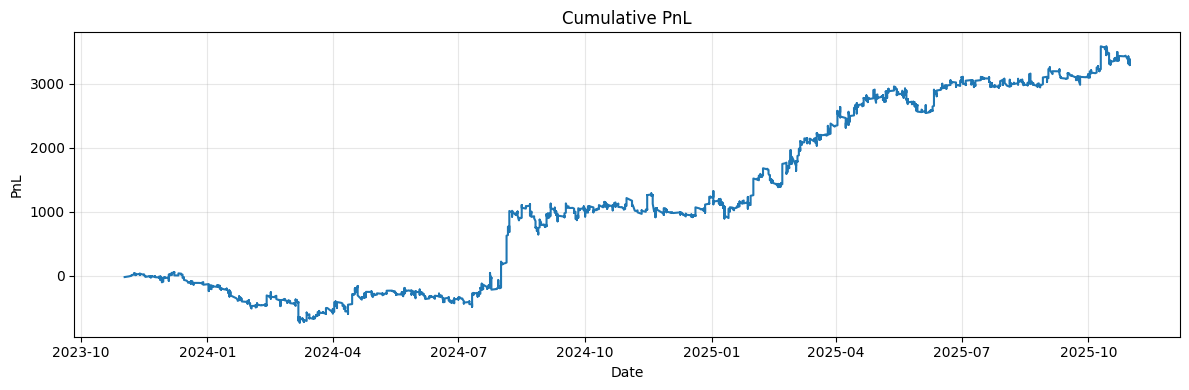

,date,entry_idx,exit_idx,entry_price,exit_price,exit_reason,pnl_points,Date
0,2023-11-02,152,167,14781.50,14798.25,flip_exit,-16.75,2023-11-02
1,2023-11-05,2796,2804,15183.75,15173.75,target,10.00,2023-11-05
2,2023-11-07,5230,5232,15360.75,15350.75,target,10.00,2023-11-07
3,2023-11-07,5240,5245,15357.50,15347.50,target,10.00,2023-11-07
4,2023-11-07,5255,5259,15360.75,15360.50,flip_exit,0.25,2023-11-07
...,...,...,...,...,...,...,...,...
4483,2025-10-31,706342,706342,25943.75,25933.75,target,10.00,2025-10-31
4484,2025-10-31,706343,706343,25942.50,25932.50,target,10.00,2025-10-31
4485,2025-10-31,706358,706362,25913.75,25903.75,target,10.00,2025-10-31
4486,2025-10-31,706363,706369,25914.00,25904.00,target,10.00,2025-10-31


In [79]:
print(test_short['pnl_points'].sum())
print(len(test_short[test_short['pnl_points']>0])/len(test_short))
print(len(test_short))
print('')


stats = trade_stats(test_short, pnl_col='pnl_points')
print(pd.Series(stats))




temp = test_short.copy(deep=True)

if 'date' in temp.columns:
    temp['Date'] = pd.to_datetime(temp['date'], errors='coerce')
    df = temp.sort_values('date')

r = pd.to_numeric(df['pnl_points'], errors='coerce').fillna(0)

# 1) Cumulative PnL (use for per-trade PnL/points)
df['cum_pnl'] = r.cumsum()


import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(df['Date'] if 'Date' in df.columns else df.index, df['cum_pnl'])
plt.title('Cumulative PnL')
plt.xlabel('Date' if 'Date' in df.columns else 'Trade #')
plt.ylabel('PnL')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

temp

3532.25
0.7172087012707301
4643

n_trades                 4643.000000
win_rate                    0.720311
avg_win                     9.573273
avg_loss                  -21.923241
payoff_ratio                0.436672
expectancy_per_trade        0.764060
gross_profit            31879.000000
gross_loss              28346.750000
profit_factor               1.124609
total_pnl                3532.250000
median_pnl                 10.000000
max_drawdown             -797.000000
sharpe_per_trade            2.536259
dtype: float64


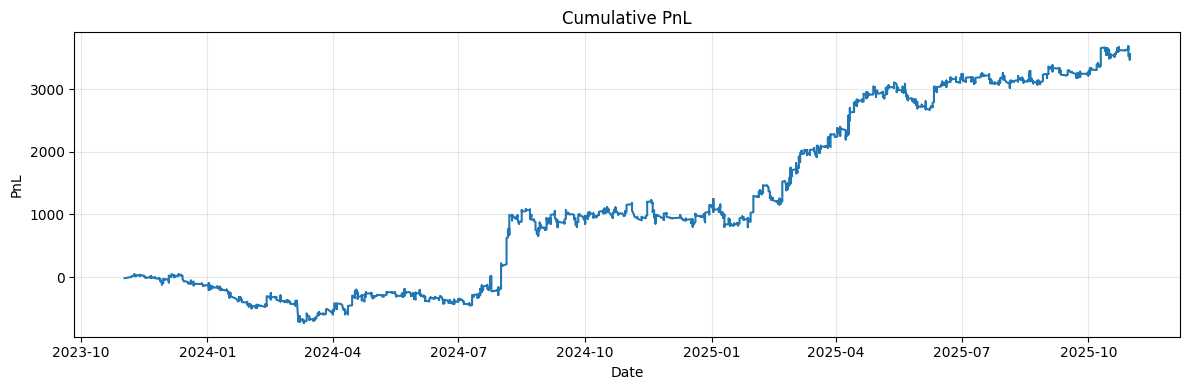

,date,entry_idx,exit_idx,entry_price,exit_price,exit_reason,pnl_points,Date
0,2023-11-02,152,167,14781.50,14798.25,flip_exit,-16.75,2023-11-02
1,2023-11-05,2796,2804,15183.75,15173.75,target,10.00,2023-11-05
2,2023-11-07,5230,5232,15360.75,15350.75,target,10.00,2023-11-07
3,2023-11-07,5240,5245,15357.50,15347.50,target,10.00,2023-11-07
4,2023-11-07,5255,5259,15360.75,15360.50,flip_exit,0.25,2023-11-07
...,...,...,...,...,...,...,...,...
4638,2025-10-31,706342,706342,25943.75,25933.75,target,10.00,2025-10-31
4639,2025-10-31,706343,706343,25942.50,25932.50,target,10.00,2025-10-31
4640,2025-10-31,706358,706362,25913.75,25903.75,target,10.00,2025-10-31
4641,2025-10-31,706363,706369,25914.00,25904.00,target,10.00,2025-10-31


In [86]:
def scalp_regime_short_only_with_stop(
        df,
        target_points=10.50,
        stop_points=100.0,       # NEW: hard stop in points (e.g., 100 for NQ)
        slippage_points=0.50,    # slippage in *points*; set 0.25 for 1 tick on NQ
        tick=0.25,
        session_col="Date"
):
    data = df.copy(deep=True)

    # trailing means from *past* bars only
    data['trailing10_low'] = data['low'].rolling(10).mean().shift(1)
    data['trailing10_high'] = data['high'].rolling(10).mean().shift(1)

    # shift regime/side/tradable by 1 bar (decide at t, trade at t+1)
    sig_cols = ['tradable', 'side_bias']
    for c in sig_cols:
        if c in data.columns:
            data[c + '_sig'] = data.groupby(session_col)[c].shift(1)
        else:
            raise KeyError(f"Missing column '{c}' in df")

    trades = []
    in_pos = False
    entry_px = None
    target_px = None
    stop_px = None
    entry_idx = None
    entry_date = None

    for i in range(len(data) - 1):
        row = data.iloc[i]
        nxt = data.iloc[i + 1]

        # reset between sessions
        if i > 0 and data.iloc[i][session_col] != data.iloc[i - 1][session_col]:
            in_pos = False
            entry_px = target_px = stop_px = None
            entry_idx = entry_date = None

        # --- ENTRY (decided at t, attempted/fills on t+1) ---
        if (not in_pos) and (row['tradable_sig'] is True) and (row['side_bias_sig'] == 'short'):
            if pd.notna(row['trailing10_high']):
                limit_px = _round_tick(row['trailing10_high'] - 0.25, tick, "nearest")

                # gap-through fill at open
                if nxt['open'] >= limit_px:
                    entry_px = nxt['open'] - slippage_points
                    target_px = _round_tick(entry_px, tick, "nearest") - target_points
                    stop_px   = _round_tick(entry_px, tick, "nearest") + stop_points
                    in_pos = True
                    entry_idx = i + 1
                    entry_date = nxt[session_col]

                # limit fill intrabar
                elif nxt['high'] >= limit_px:
                    entry_px = limit_px - slippage_points
                    target_px = _round_tick(entry_px, tick, "nearest") - target_points
                    stop_px   = _round_tick(entry_px, tick, "nearest") + stop_points
                    in_pos = True
                    entry_idx = i + 1
                    entry_date = nxt[session_col]

        # --- EXIT MANAGEMENT on the next bar (only if in position) ---
        if in_pos:
            # Priority: STOP first (worst-case if both hit), then TARGET, then FLIP
            # 0) Adverse gap through stop at open
            if nxt['open'] > stop_px:
                exit_px = nxt['open'] + slippage_points
                trades.append({
                    'date': entry_date,
                    'entry_idx': entry_idx,
                    'exit_idx': i + 1,
                    'entry_price': entry_px,
                    'exit_price': exit_px,
                    'exit_reason': 'stop_gap',
                    'pnl_points': entry_px - exit_px
                })
                in_pos = False
                entry_px = target_px = stop_px = None
                entry_idx = entry_date = None
                continue

            # 1) Regular stop: if next bar’s high reaches stop → exit at stop
            if nxt['high'] >= stop_px:
                exit_px = stop_px + slippage_points
                trades.append({
                    'date': entry_date,
                    'entry_idx': entry_idx,
                    'exit_idx': i + 1,
                    'entry_price': entry_px,
                    'exit_price': exit_px,
                    'exit_reason': 'stop',
                    'pnl_points': entry_px - exit_px
                })
                in_pos = False
                entry_px = target_px = stop_px = None
                entry_idx = entry_date = None
                continue

            # 2) Profit target: if next bar’s low reached it → exit at target
            if nxt['low'] <= target_px:
                exit_px = target_px + slippage_points
                trades.append({
                    'date': entry_date,
                    'entry_idx': entry_idx,
                    'exit_idx': i + 1,
                    'entry_price': entry_px,
                    'exit_price': exit_px,
                    'exit_reason': 'target',
                    'pnl_points': entry_px - exit_px
                })
                in_pos = False
                entry_px = target_px = stop_px = None
                entry_idx = entry_date = None
                continue

            # 3) Side flip guard: if signal flips away from short, exit next bar at open
            if (row['side_bias_sig'] != 'short') or (row['tradable_sig'] is not True):
                exit_px = nxt['open'] + slippage_points
                trades.append({
                    'date': entry_date,
                    'entry_idx': entry_idx,
                    'exit_idx': i + 1,
                    'entry_price': entry_px,
                    'exit_price': exit_px,
                    'exit_reason': 'flip_exit',
                    'pnl_points': entry_px - exit_px
                })
                in_pos = False
                entry_px = target_px = stop_px = None
                entry_idx = entry_date = None

    return pd.DataFrame(trades)



test_short = scalp_regime_short_only_with_stop(regime_df)
test_short


print(test_short['pnl_points'].sum())
print(len(test_short[test_short['pnl_points']>0])/len(test_short))
print(len(test_short))
print('')


stats = trade_stats(test_short, pnl_col='pnl_points')
print(pd.Series(stats))




temp = test_short.copy(deep=True)

if 'date' in temp.columns:
    temp['Date'] = pd.to_datetime(temp['date'], errors='coerce')
    df = temp.sort_values('date')

r = pd.to_numeric(df['pnl_points'], errors='coerce').fillna(0)

# 1) Cumulative PnL (use for per-trade PnL/points)
df['cum_pnl'] = r.cumsum()


import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(df['Date'] if 'Date' in df.columns else df.index, df['cum_pnl'])
plt.title('Cumulative PnL')
plt.xlabel('Date' if 'Date' in df.columns else 'Trade #')
plt.ylabel('PnL')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

temp